# FASTKDE

An efficient kernel density estimation for approximating multivariate distributions.

Reference: https://github.com/LBL-EESA/fastkde

## To Do List:

- make a function that is sampling based on a FastKDE approximation, where the user can plugin the number of points to be sampled.
- provide additional options such as random_state and vector shape for the output.
- make a library or a class that you can import with this functionality for future research.
- test your function with visualizations for your samples and the underlying density estimation.

In [ ]:
!pip install -q fastKDE

In [ ]:
#! pip install --upgrade -q statsmodels
import statsmodels.api as sm

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import numpy as np
import fastkde
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity

In [ ]:
#Generate two random variables dataset (representing 100000 pairs of datapoints)
N1 = np.random.normal(size=1000)
N2 = np.random.normal(scale=0.5, size=1000)
x = N1+1.5*N2
y = N1-N2

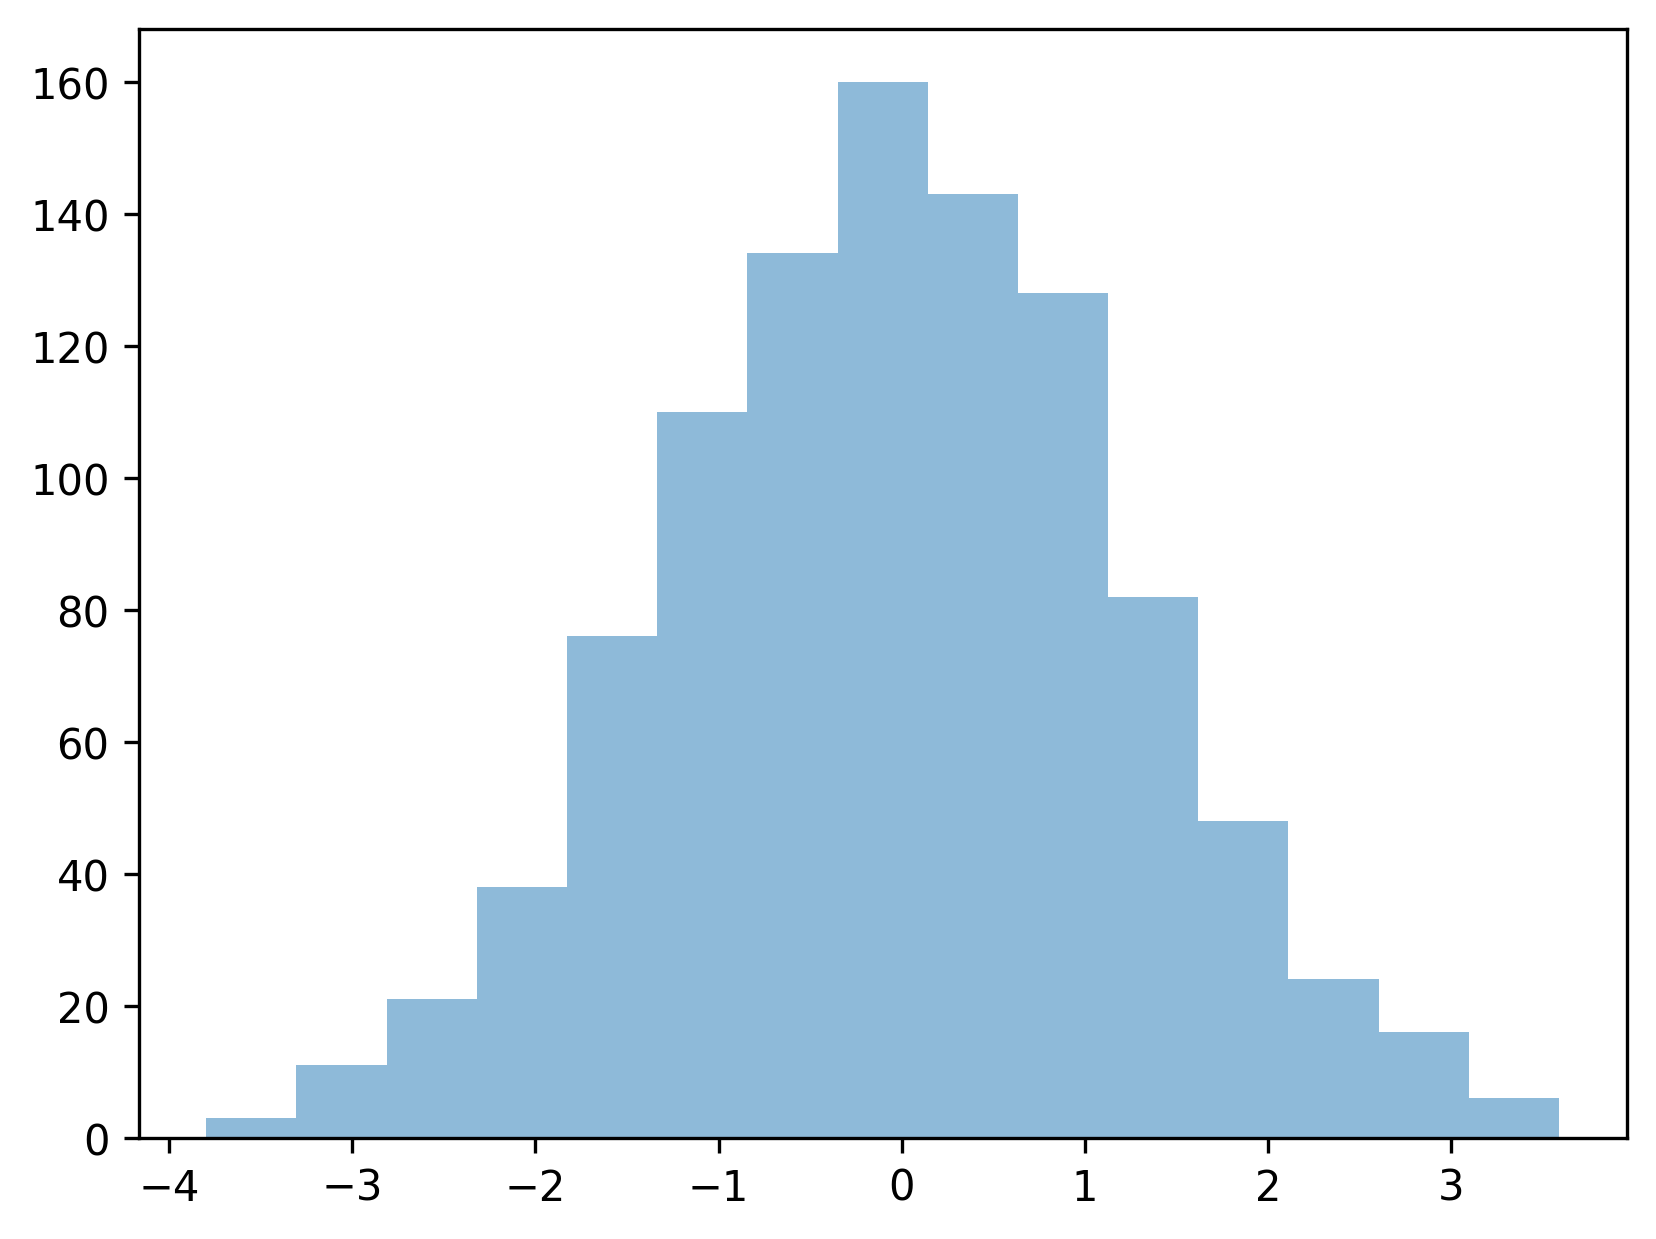

In [ ]:
plt.hist(x,bins=15,alpha=0.5)
plt.show()

In [ ]:
from scipy.stats import kstest

In [ ]:
# we want to verify the normality of x
kstest((x-np.mean(x))/np.std(x),'norm')

KstestResult(statistic=0.011639939809857225, pvalue=0.9990453896976517, statistic_location=0.29331697524111233, statistic_sign=1)

In [ ]:
# let's find the covariance between X and Y
np.cov(x,y)

array([[1.58114008, 0.66738709],
       [0.66738709, 1.2625804 ]])

In [ ]:
#Do the self-consistent density estimate
# myPDF,axes = fastKDE.pdf(x,y,numPoints=2**8+1,ecfPrecision=2)

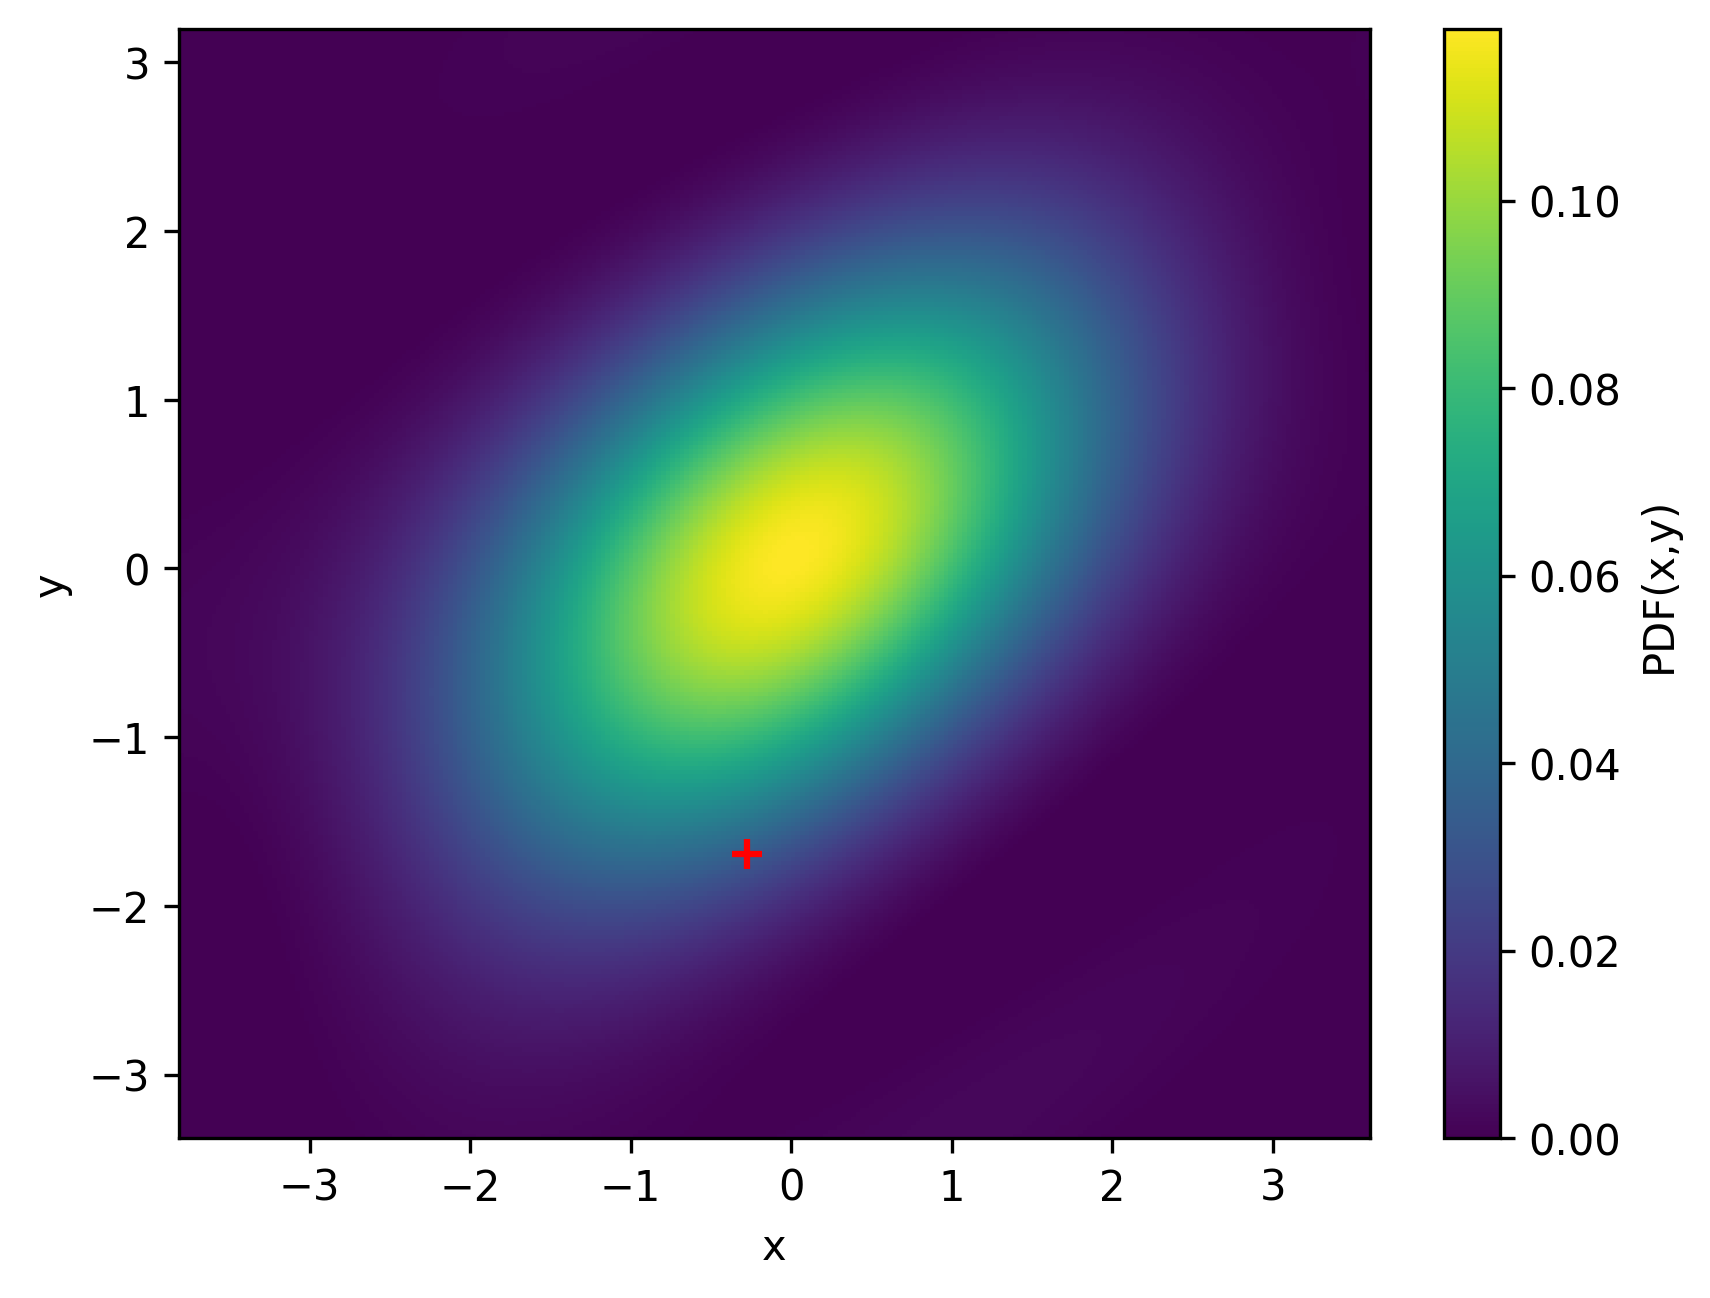

In [ ]:
myPDF = fastkde.pdf(x,y,num_points=2**9+1,var_names=['x','y'])
myPDF.plot()
plt.scatter(x0,y0,marker='+',s=50,color='red')
plt.show()

## We want to Sample the Approximated Distribution

In [ ]:
# explore the approximation
myPDF

<xarray.DataArray (y: 256, x: 257)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00049122, 0.00052497,
        0.000561  ],
       [0.        , 0.        , 0.        , ..., 0.00048742, 0.0005221 ,
        0.00055899],
       [0.        , 0.        , 0.        , ..., 0.00048226, 0.00051777,
        0.00055542]])
Coordinates:
  * x        (x) float64 -3.797 -3.768 -3.739 -3.711 ... 3.503 3.532 3.56 3.589
  * y        (y) float64 -3.363 -3.338 -3.312 -3.286 ... 3.105 3.13 3.156 3.182
Attributes:
    long_name:  PDF(x,y)

In [ ]:
# we could use random sampling for 1-dimensional arrays
np.random.choice(np.linspace(0,10,11),2)

array([2., 6.])

In [ ]:
# for us, the main idea is to flatten n-dimensional arrays
len(np.array(myPDF).flatten())

65792

In [ ]:
# we want to sample values that are present in myPDF
ij = np.random.choice(np.arange(0,256*257,1),p = np.array(myPDF).flatten()/sum(np.array(myPDF).flatten()))

In [ ]:
# here we would have to divide 33854 by the number of columns in myPDF, that is 257
np.floor(33854/257).astype(int)


131

In [ ]:
(33854 % 257)

187

In [ ]:
# this means we sample a value of x
x0 = float(np.array(myPDF.x[np.floor(ij/257).astype(int)]))

In [ ]:
y0 = float(np.array(myPDF.y[ij % 257]))

In [ ]:
y0

1.436259951947772

In [ ]:
sum(np.array(myPDF).flatten())

329.5016337829319

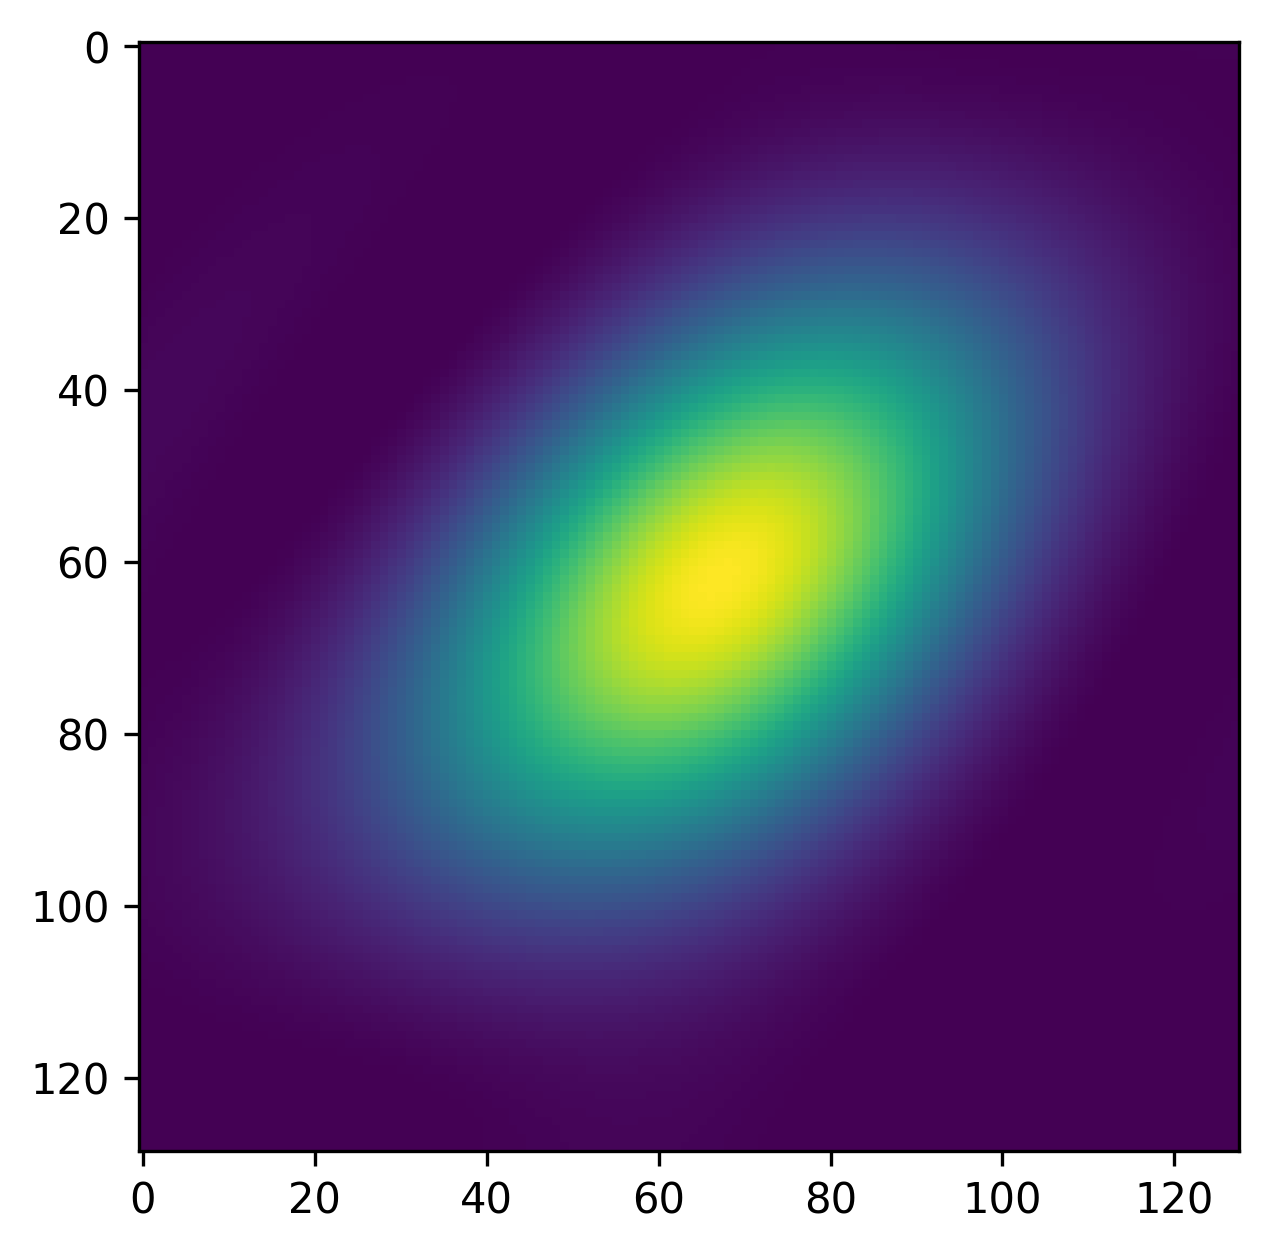

In [ ]:
plt.imshow(np.rot90(np.array(myPDF).reshape(len(myPDF.y),len(myPDF.x))))
plt.show()

In [ ]:
np.array(myPDF).shape

(128, 129)

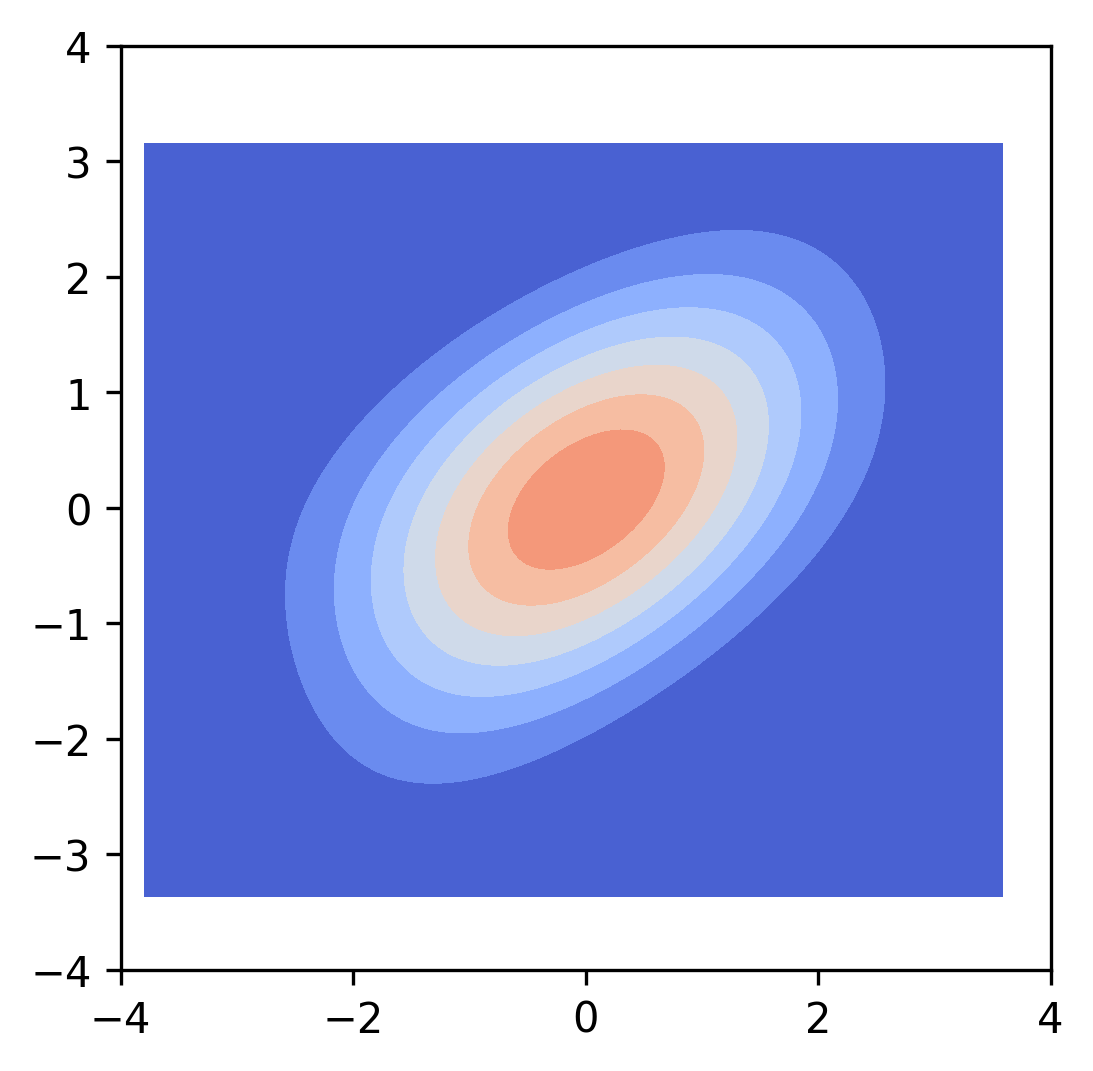

In [ ]:
#Extract the axes from the axis list
v1,v2 = myPDF.x, myPDF.y

#Plot contours of the PDF should be a set of concentric ellipsoids centered on
#(0.1, -300) Comparitively, the y axis range should be tiny and the x axis range
#should be large
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v2),len(v1)),cmap='coolwarm',vmin=0,vmax=0.15)
#plt.contour(v1,v2,myPDF,colors='k',levels=[0.002,0.02,0.04,0.06,0.08,0.1,0.12,0.14],vmax=0.15)
plt.show()

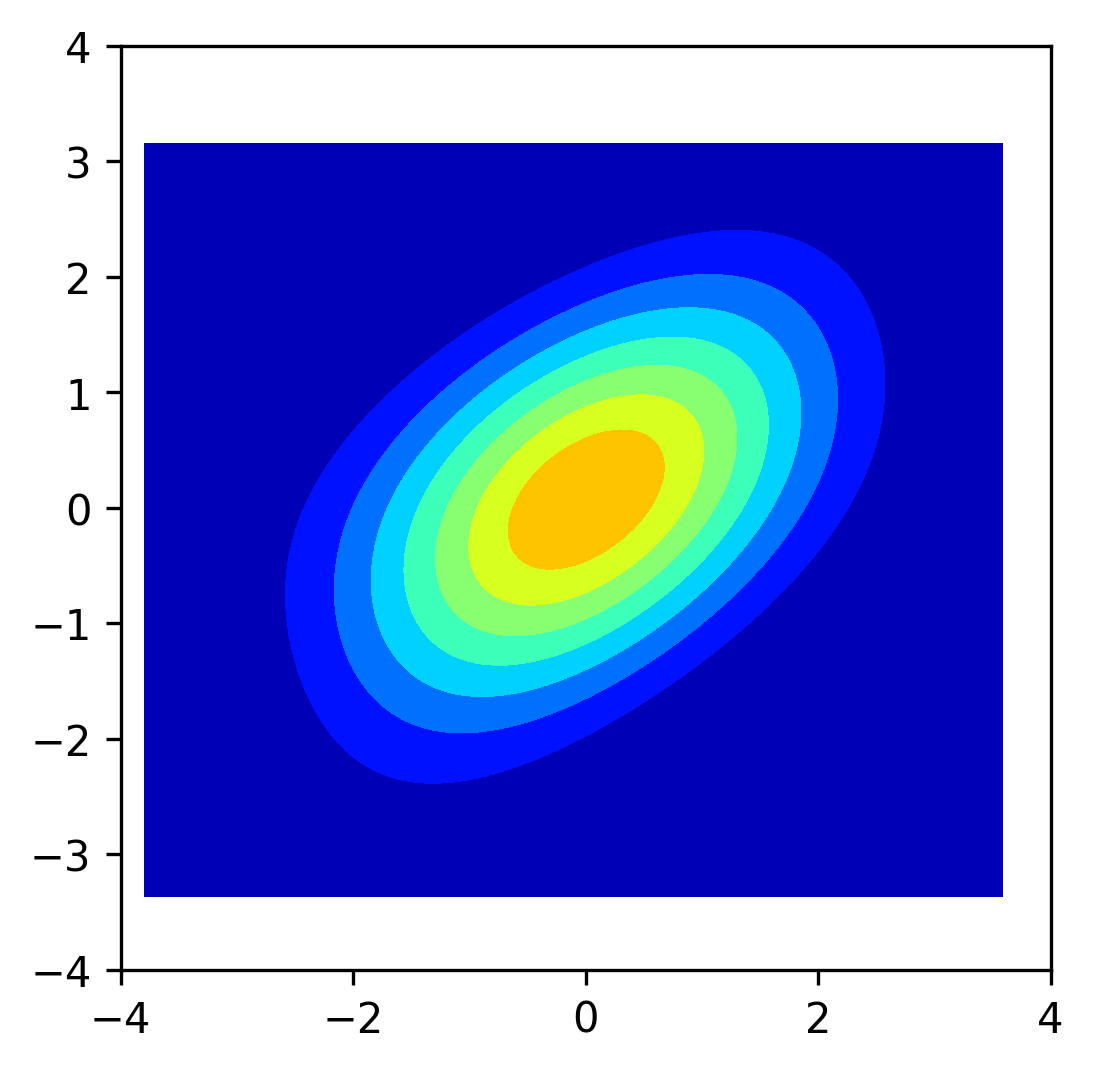

In [ ]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(v1,v2,np.array(myPDF).reshape(len(v2),len(v1)),cmap='jet',vmin=0,vmax=0.16)
#plt.contour(v1,v2,myPDF,colors='k')
plt.show()

# Comparison with Different KDE Methods

In [ ]:
dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')

In [ ]:
xmin = -4 #x.min()
xmax = 4 # x.max()
ymin = -4 #y.min()
ymax = 4  #y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = dens_u.pdf(positions)

In [ ]:
X.shape

(100, 100)

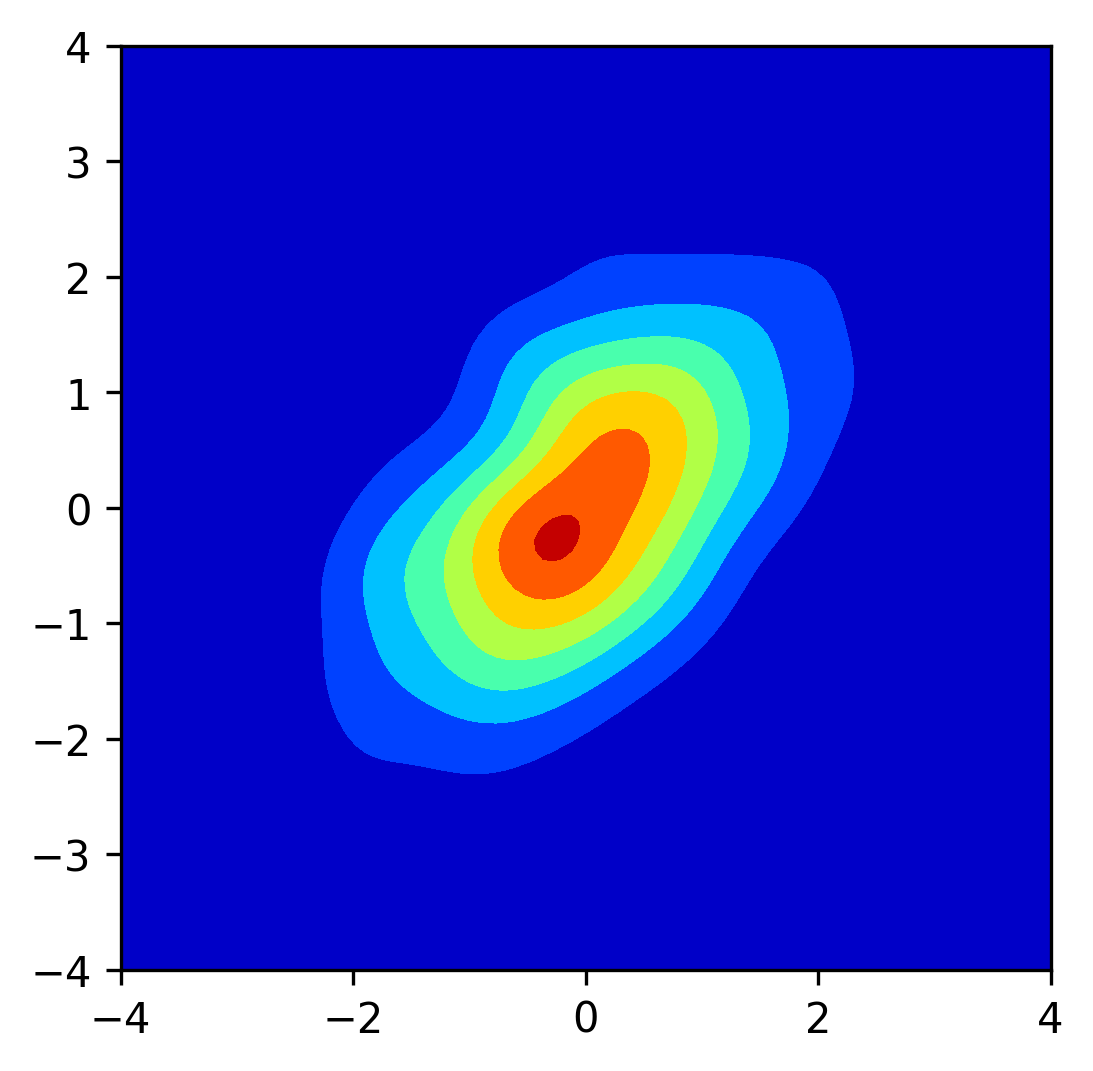

In [ ]:
plt.figure(figsize=(4,4))
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.contourf(X,Y,np.reshape(Z,X.shape),cmap='jet',vmin=0,vmax=0.16)
plt.show()

In [ ]:
def kde1(x, y, ax):
    from scipy.stats import gaussian_kde

    # Calculate the point density
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy) # bw_method='scott'

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(kernel(positions).T, X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde2(x, y, ax):
    from sklearn.neighbors import KernelDensity

    xy = np.vstack([x,y])

    d = xy.shape[0]
    n = xy.shape[1]
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
    #bw = n**(-1./(d+4)) # scott
    print('bw: {}'.format(bw))

    kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(xy.T)

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()


    X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)

    #ax.contour(X, Y, Z, colors='k')

def kde3(x,y,ax):
  dens_u = sm.nonparametric.KDEMultivariate(data=[x,y],var_type='cc', bw='normal_reference')
  xmin = x.min()
  xmax = x.max()
  ymin = y.min()
  ymax = y.max()

  X, Y = np.mgrid[xmin:xmax:257j, ymin:ymax:257j]
  positions = np.vstack([X.ravel(), Y.ravel()])
  Z = np.reshape(dens_u.pdf(positions),X.shape)
  ax.imshow(np.rot90(Z), cmap='coolwarm',
              extent=[-4, 4, -4, 4], vmin=0,vmax=0.15)

  #ax.contour(X, Y, Z, colors='k')

def kde4(x,y,ax):
  Z = fastkde.pdf(x,y,num_points=2**8+1,var_names=['X','Y'])
  X,Y = Z.X, Z.Y
  ax.imshow(np.rot90(np.array(Z).reshape(len(Y),len(X))), cmap='coolwarm',
              extent=[-4, 4, -4, 4],vmin=0,vmax=0.15)
  #ax.contour(X, Y, Z, colors='k')

bw: 0.31622776601683794


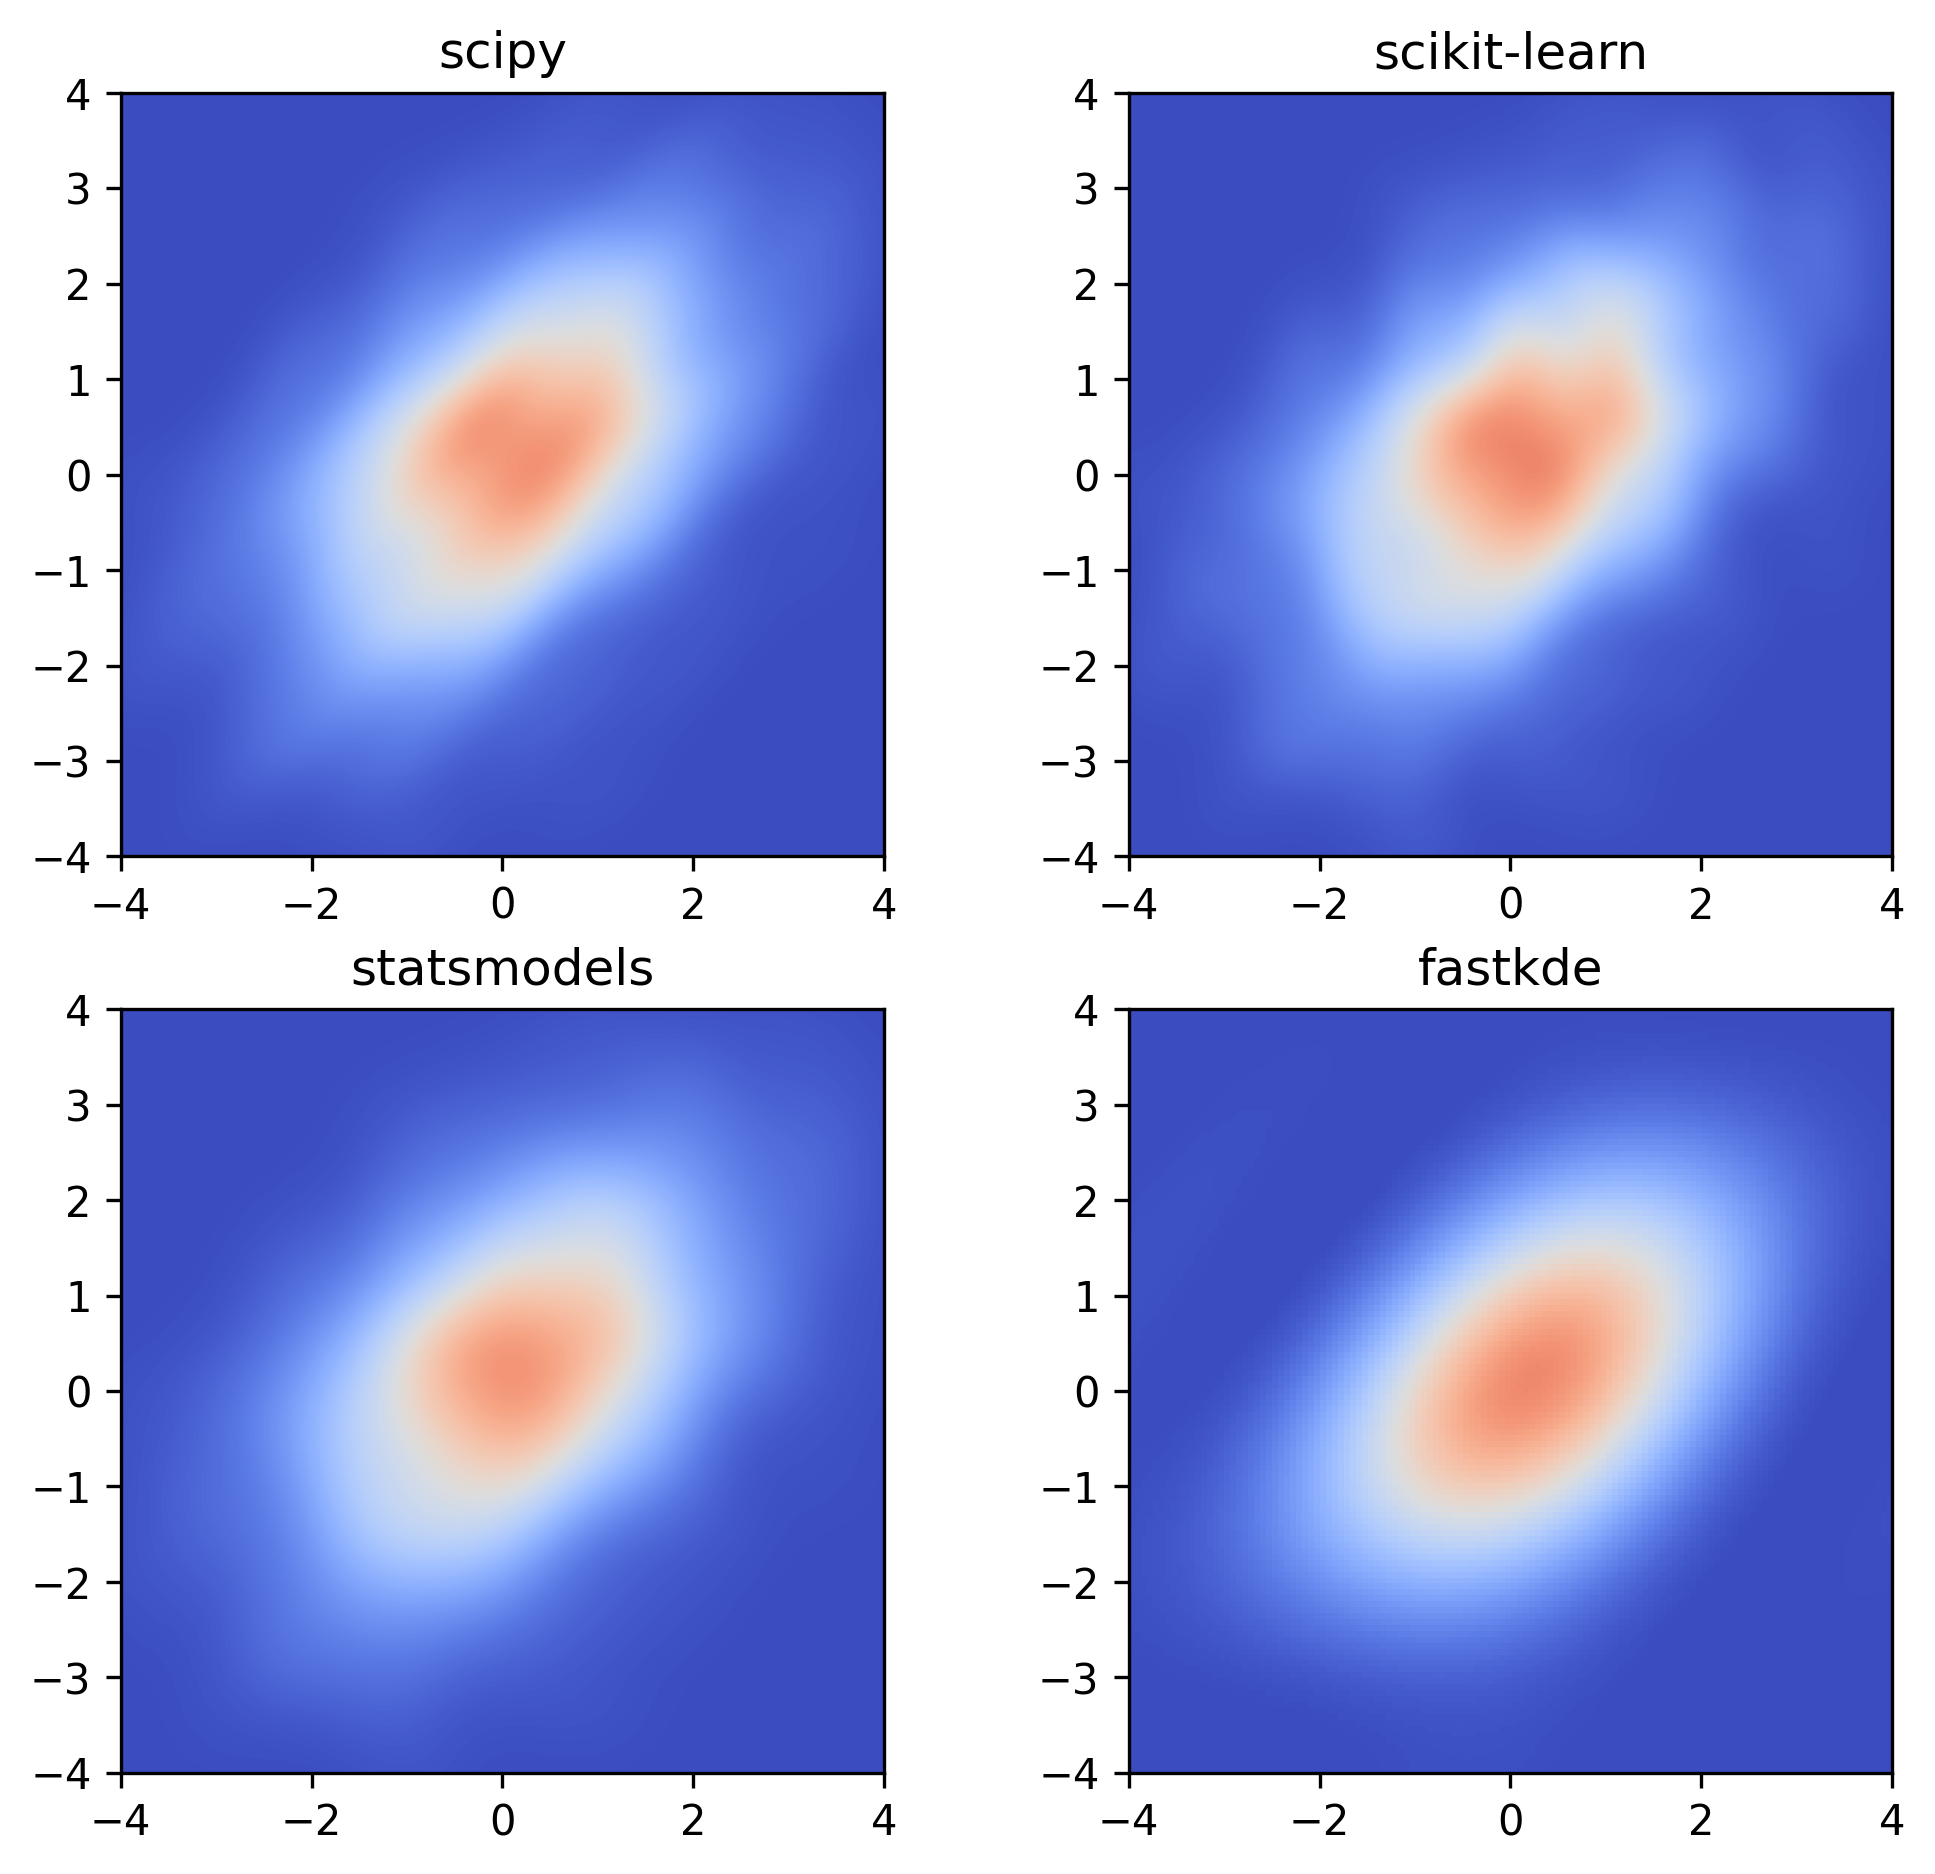

In [ ]:
fig, axarr = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.0, bottom=0.18)

ax = axarr[0,0]
kde1(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scipy')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[0,1]
kde2(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('scikit-learn')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,0]
kde3(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('statsmodels')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

ax = axarr[1,1]
kde4(x, y, ax)
# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
ax.set_title('fastkde')

ax.set_xlim((-4,4))
ax.set_ylim((-4,4))

#plt.tight_layout()
plt.savefig('kde.png')
plt.show()

# How to Sample

In [ ]:
myPDF

<xarray.DataArray (y: 128, x: 129)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0004317 , 0.00048383,
        0.00054672],
       [0.        , 0.        , 0.        , ..., 0.00042634, 0.00048372,
        0.00055118],
       [0.        , 0.        , 0.        , ..., 0.00041654, 0.00047833,
        0.0005496 ]])
Coordinates:
  * x        (x) float64 -3.797 -3.739 -3.682 -3.624 ... 3.416 3.474 3.532 3.589
  * y        (y) float64 -3.363 -3.312 -3.261 -3.209 ... 3.002 3.053 3.105 3.156
Attributes:
    long_name:  PDF(x,y)

In [ ]:
np.random.seed(123)

In [ ]:
np.random.choice(128*129,size=2,p=np.array(myPDF).flatten()/sum(np.array(myPDF).flatten()))

array([10125,  7051])

In [ ]:
10125 / 129

78.48837209302326